In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Descrevendo o Dataset

In [ ]:
df = pd.read_csv('train.csv', sep=',')
df.dropna(inplace=True)

In [ ]:
df.head()

,branch-instructions,instructions,L1-dcache-loads,branch-loads,dTLB-loads,Attack
0,0.024173,0.117983,0.036300,0.022143,0.030530,0
1,0.024618,0.119842,0.036422,0.025209,0.033180,0
2,0.022638,0.110602,0.036401,0.021949,0.030762,0
3,0.023446,0.114246,0.034098,0.020650,0.029688,0
4,0.023962,0.116889,0.031932,0.023741,0.032932,0


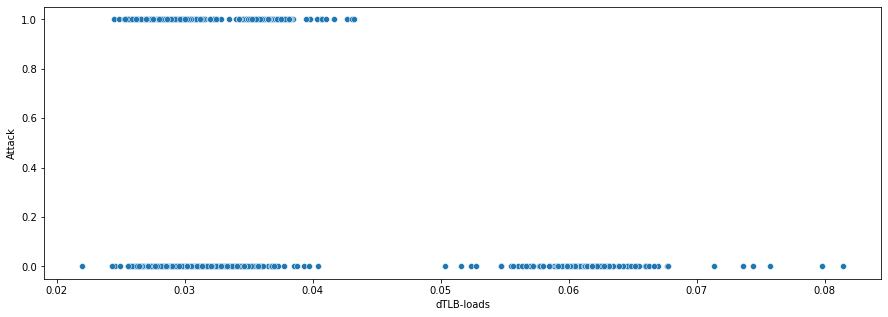

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='dTLB-loads', y='Attack', data=df)
plt.show()

Ajustes dos dados


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn import metrics

In [ ]:
for c in df.columns[df.dtypes == 'object']: # df.dtypes == 'object'
    df[c] = df[c].astype('category')


In [ ]:
#Transforma as categorias em números

for c in df.columns[df.dtypes == 'category']: # df.dtypes == 'object'
    df[c] = df[c].cat.codes

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,3,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,2,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
6,48,9,2,5,0,1,0,0,6,4,142,2,999,0,1,-1.8,92.893,-46.2,1.334,5099.1,0
13,34,0,1,6,0,1,0,0,6,3,88,3,999,1,0,-1.8,92.893,-46.2,1.344,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,28,7,2,3,0,1,0,0,3,3,192,1,999,0,1,-1.7,94.215,-40.3,0.876,4991.6,0
37065,52,9,1,5,0,1,0,0,7,0,64,1,999,1,0,-0.1,93.200,-42.0,4.021,5195.8,0
37066,54,0,1,2,0,0,1,0,3,1,131,4,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0


In [ ]:
y = df.Attack
X = df.drop('Attack', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15036, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1019, 5), (181, 5), (1019,), (181,))

In [ ]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
df_norm = pd.DataFrame(X_norm, columns=df.columns.drop('Attack'))
df_norm.head()

,branch-instructions,instructions,L1-dcache-loads,branch-loads,dTLB-loads
0,0.171281,0.157266,0.226369,0.189414,0.143947
1,0.182083,0.166345,0.228390,0.264681,0.188521
2,0.134006,0.121216,0.228038,0.184654,0.147842
3,0.153613,0.139012,0.189902,0.152767,0.129775
4,0.166136,0.151920,0.154035,0.228647,0.184351


Primeiro Método - Grid search em uma SVC

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn import metrics


In [ ]:
%%time


# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [100, 50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=28)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.922500 using {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.878333 (0.022006) with: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
0.922500 (0.016548) with: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.195000 (0.034601) with: {'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.873333 (0.025313) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.915833 (0.023209) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.195000 (0.035329) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.853611 (0.029082) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.854167 (0.030863) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.197500 (0.034504) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.806389 (0.041033) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.842778 (0.032040) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.252778 (0.036473) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.817500 (0.035378) with: {'C': 0.1, 'gamma': 'scale', 

In [ ]:
params ={'C': (100,), 'gamma': ('scale',), 'kernel': ('rbf',)}
clf = GridSearchCV(SVC(), params, scoring='accuracy', cv=20)
clf.fit(X_train,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (100,), 'gamma': ('scale',), 'kernel': ('rbf',)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
p = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        91
           1       0.86      0.93      0.89        90

    accuracy                           0.89       181
   macro avg       0.89      0.89      0.89       181
weighted avg       0.89      0.89      0.89       181



Logistic Reg



In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

#generate predictions on the test set from the logistic regression
#lr_predict_test = lr.predict(y_test)

print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.71      0.37      0.49        91
           1       0.57      0.84      0.68        90

    accuracy                           0.61       181
   macro avg       0.64      0.61      0.59       181
weighted avg       0.64      0.61      0.58       181



Segundo Método - Random Forest

In [ ]:
#pipeline para realizar os k-folds no conjunto de treino
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier(n_estimators=330))
#grid de Hiperparâmetros para serem testados
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestclassifier__min_samples_leaf': [9, 10, 11,12],
                   'randomforestclassifier__max_depth': [12, 13,14,15],
                   'randomforestclassifier__min_samples_split': [2, 3,4,5]}  
         
# Grid para k-fold de 10 dobras
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [ ]:
%%time
#Ajusta o modelo aos dados de treino
model=clf.fit(X_train,y_train)

CPU times: user 23min 8s, sys: 5.7 s, total: 23min 14s
Wall time: 23min 21s


In [ ]:
p = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        91
           1       0.91      0.94      0.93        90

    accuracy                           0.93       181
   macro avg       0.93      0.93      0.93       181
weighted avg       0.93      0.93      0.93       181



Random Forest com Hyperopt

In [ ]:
!pip install hyperopt==0.2.5

     |████████████████████████████████| 972kB 15.9MB/s 
  Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.2


In [ ]:
from hyperopt import  hp,space_eval,tpe,fmin,STATUS_OK,Trials

def optimize(params):
  
   clf = GridSearchCV(RandomForestClassifier(), params, scoring='accuracy', cv=10)
   clf.fit(X_train,y_train)
   best_score = clf.best_score_
   return best_score

In [ ]:
%%time
space = {
        #'oob_score':[hp.choice('tree_oob_score',[True,False])],
        #'warm_start':[hp.choice('tree_warm_start',[True,False])],
        'max_depth':[hp.randint('tree_max_depth',1,20)],
        'n_estimators':[hp.randint('tree_n_estimators',100,1000)],
        'max_features':[hp.choice('tree_max_features',['auto','sqrt','log2'])],
        'min_samples_split':[hp.randint('tree_min_samples_split',2,20)],
        'min_samples_leaf':[hp.randint('tree_min_samples_leaf',1,20)],
        }

best = fmin(optimize,space,algo=tpe.suggest,max_evals=1000)

  2%|▏         | 19/1000 [04:30<3:52:47, 14.24s/trial, best loss: 0.8252669384585518]


KeyboardInterrupt: ignored

In [ ]:
space_eval(space,best)

{'max_depth': (29,),
 'max_features': ('log2',),
 'min_samples_leaf': (11,),
 'min_samples_split': (3,),
 'n_estimators': (350,)}

In [ ]:
params ={'max_depth': (29,),
 'max_features': ('log2',),
 'min_samples_leaf': (11,),
 'min_samples_split': (3,),
 'n_estimators': (350,)}
clf = GridSearchCV(RandomForestClassifier(), params, scoring='accuracy', cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
p =clf.best_estimator_.predict(X_test)
print(metrics.classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        91
           1       0.90      0.93      0.92        90

    accuracy                           0.92       181
   macro avg       0.92      0.92      0.92       181
weighted avg       0.92      0.92      0.92       181



In [ ]:
test = pd.read_csv('test.csv')
for c in test.columns[test.dtypes == 'object']: # df.dtypes == 'object'
    test[c] = test[c].astype('category')
for c in test.columns[test.dtypes == 'category']: # df.dtypes == 'object'
    test[c] = test[c].cat.codes
for c in test.columns:
  test[c].replace(-1,test[c].mode().iloc[0],inplace=True)

In [ ]:
p =clf.best_estimator_.predict(test.iloc[:,1:])

In [ ]:
#vizualização dos dados a serem submetidos
sample = pd.DataFrame({'id':test.id,'y':p})
sample.to_csv("submission.csv", index=False)


SVM-Classifier

In [ ]:
from hyperopt import  hp,space_eval,tpe,fmin,STATUS_OK,Trials
from sklearn.svm import SVC

def optimize(params):
  
   clf = GridSearchCV(SVC(), params, scoring='accuracy', cv=10)
   clf.fit(X_train,y_train)
   best_score = clf.best_score_
   return -best_score

In [ ]:
space = {
        'C':[hp.randint('C',0,100)],
        'kernel':[hp.choice('kernel',['linear', 'rbf', 'sigmoid'])],
        'gamma':[hp.choice('gamma',['scale','auto'])],
        }
best = fmin(optimize,space,algo=tpe.suggest,max_evals=100)

100%|██████████| 100/100 [00:30<00:00,  3.27trial/s, best loss: -0.9205008736167736]


In [ ]:
space_eval(space,best)

{'C': (69,), 'gamma': ('scale',), 'kernel': ('rbf',)}

In [ ]:
params ={'C': (69,), 'gamma': ('scale',), 'kernel': ('rbf',)}
clf = GridSearchCV(SVC(), params, scoring='accuracy', cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (69,), 'gamma': ('scale',), 'kernel': ('rbf',)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
p =clf.best_estimator_.predict(X_test)
print(metrics.classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        91
           1       0.86      0.93      0.89        90

    accuracy                           0.89       181
   macro avg       0.89      0.89      0.89       181
weighted avg       0.89      0.89      0.89       181



In [ ]:
test = pd.read_csv('test.csv')

for c in test.columns[test.dtypes == 'object']: # df.dtypes == 'object'
    test[c] = test[c].astype('category')
for c in test.columns[test.dtypes == 'category']: # df.dtypes == 'object'
    test[c] = test[c].cat.codes
for c in test.columns:
  test[c].replace(-1,test[c].mode().iloc[0],inplace=True)

p =clf.best_estimator_.predict(test.iloc[:,1:])
print(metrics.classification_report(test, p))

NameError: ignored

In [ ]:
sample = pd.DataFrame({'id':test.id,'y':p})
sample.to_csv("submission.csv", index=False)

Xboost com hyperopt


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def optimize(params):
  
   clf = GridSearchCV(XGBClassifier(), params, scoring='accuracy', cv=10)
   clf.fit(X_train,y_train)
   best_score = clf.best_score_
   return best_score

In [ ]:
param_dist = {'objective':'binary:logistic'}

space = {
        'n_estimators':[hp.randint('n_estimators',3,1000)],
        'learning_rate':[hp.choice('learning_rate',['0.01','0.03','0.05','0.1','0.15','0.2'])],
        'max_depth':[hp.randint('max_depth', 3,10)],
        'colsample_bytree':[hp.choice('colsample_bytree',['0.1','0.3','0.5','1'])],
        'subsample':[hp.choice('subsample',['0.1','0.3','0.5','1'])]
        }

best = fmin(optimize,space,algo=tpe.suggest,max_evals=100)

100%|██████████| 100/100 [04:23<00:00,  2.64s/trial, best loss: 0.8419918462434479]


In [ ]:
p =clf.best_estimator_.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        91
           1       0.86      0.93      0.89        90

    accuracy                           0.89       181
   macro avg       0.89      0.89      0.89       181
weighted avg       0.89      0.89      0.89       181



In [ ]:
sample = pd.DataFrame({'id':test.id,'y':p})
sample.to_csv("submission.csv", index=False)